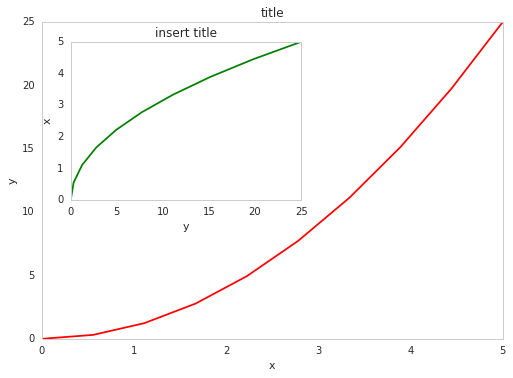

In [9]:
from pdata import *
x = np.linspace(0, 5, 10)
y = x ** 2
with sns.axes_style("whitegrid",{'axes.grid': False}):    
    fig = figure()

    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.15, 0.45, 0.4, 0.4]) # inset axes

    # main figure
    axes1.plot(x, y, 'r')
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    axes1.set_title('title')

    # insert
    axes2.plot(y, x, 'g')
    axes2.set_xlabel('y')
    axes2.set_ylabel('x')
    axes2.set_title('insert title');

In [12]:
from IPython.display import IFrame, HTML
from IPython.core.display import display

display(IFrame("https://code.earthengine.google.com", '800px', '600px'))

In [16]:
iris_data[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


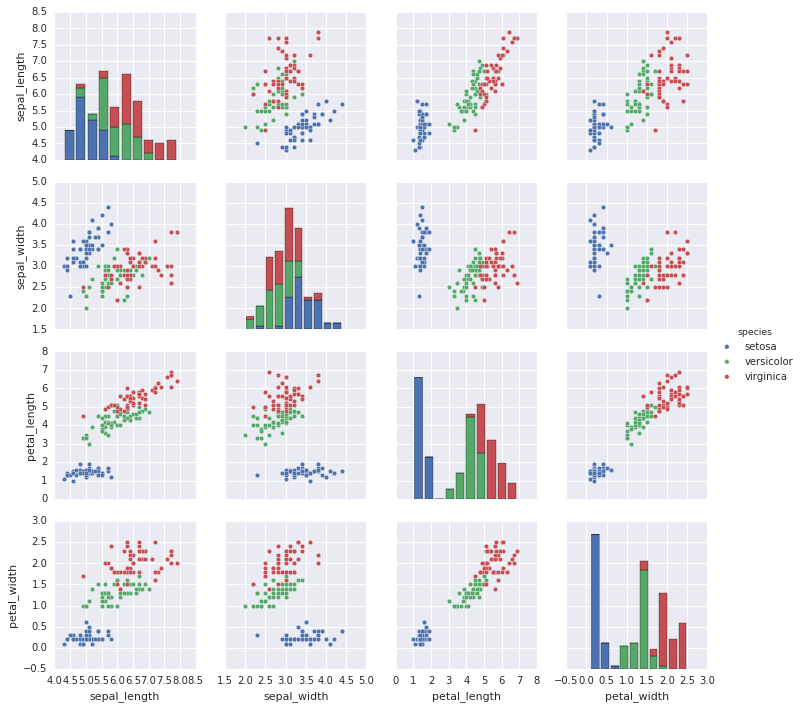

In [17]:
iris_data = sns.load_dataset("iris")
iris_data.describe()
sns.pairplot(iris_data.dropna(), hue='species');

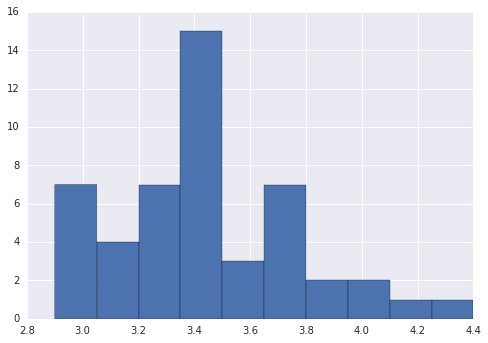

In [23]:
iris_data = iris_data.loc[(iris_data['species'] != 'setosa') | (iris_data['sepal_width'] >= 2.5)]
iris_data.loc[iris_data['species'] == 'setosa', 'sepal_width'].hist();

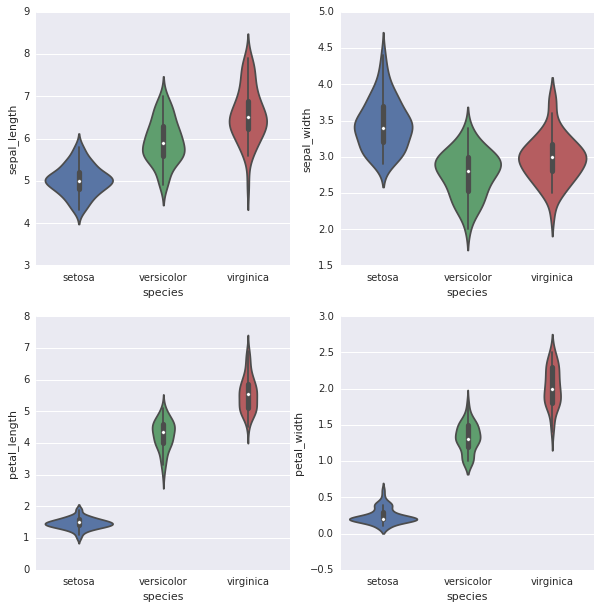

In [26]:
figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'species':
        continue
    subplot(2, 2, column_index + 1)
    sns.violinplot(x='species', y=column, data=iris_data);

In [29]:
all_inputs = iris_data[['sepal_length', 'sepal_width',
                             'petal_length', 'petal_width']].values

# Similarly, we can extract the classes
all_classes = iris_data['species'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# Here's what a subset of our inputs looks like:
print(all_inputs[:5])

from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

In [32]:
from sklearn import tree
clf = decision_tree_classifier.fit(training_inputs, training_classes)
tree.export_graphviz(clf,out_file='tree.dot')   

In [45]:
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Exception: "dot" not found in path.

In [44]:
dir(graph[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_attribute__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_edge',
 'add_node',
 'add_subgraph',
 'create',
 'create_attribute_methods',
 'create_canon',
 'create_cmap',
 'create_cmapx',
 'create_cmapx_np',
 'create_dia',
 'create_dot',
 'create_fig',
 'create_gd',
 'create_gd2',
 'create_gif',
 'create_hpgl',
 'create_imap',
 'create_imap_np',
 'create_ismap',
 'create_jpe',
 'create_jpeg',
 'create_jpg',
 'create_mif',
 'create_mp',
 'create_pcl',
 'create_pdf',
 'create_pic',
 'create_plain',
 'create_plain-ext',
 'create_png',
 'create_ps',
 'create_ps2',
 'create_svg',
 'create_svgz',
 'create_vml',
 'create_vmlz',
 'create_vrml',
 'crea